# ENG6600 - Lab01: Breaking Ice with the Titanic Survival Dataset

Welcome to ENG6600: Software Architecture for AI Systmes. This notebook outlines how you would setup a Machine Learning pipeline. In this notebook, we will cover the following stages of the Machine Learning workflow: 
1. Data cleaning
2. Data labeling
3. Feature engineering
4. Model training
5. Model evaluation

## About the dataset
*The dataset and following description are from [Kaggle](https://www.kaggle.com).* 
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered "unsinkable" RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
The dataset from Kaggle has been provided in CSV format in the `dataset` directory in this project's root directory. 

## Setting up the environment

In [137]:
import warnings
from datetime import datetime
from typing import Any, Callable, Dict, Iterable
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import NotFittedError
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    FunctionTransformer, OneHotEncoder, StandardScaler)
from sklearn.model_selection import (
    BaseCrossValidator, GridSearchCV, StratifiedKFold, train_test_split)
from sklearn.svm import SVC
import numpy as np
#import mlflow
import dvc.api
import pandas as pd
from scipy.io.arff import loadarff
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (
    BaseCrossValidator, GridSearchCV, StratifiedKFold, train_test_split)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
from datetime import datetime
from typing import Any, Callable, Dict, Iterable
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import NotFittedError
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    FunctionTransformer, OneHotEncoder, StandardScaler)
from sklearn.model_selection import (
    BaseCrossValidator, GridSearchCV, StratifiedKFold, train_test_split)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, precision_score, recall_score

sns.set(rc={'figure.figsize':(8 ,5)})

warnings.filterwarnings('ignore')
sns.set()

## Load the dataset

In [60]:
df = pd.read_csv('dataset/titanic.csv') #read the csv as a dataframe
df.head(5) #Let's peek at some rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Statistics

In [61]:
df.info() #Let's see some properties of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Description

1. `Passenger ID` - Incrementing passenger ID starting at 1;
2. `Survived` - Survived? (0 = No, 1 = Yes);
3. `Pclass` - Passenger/Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd);
4. `Name` - Passenger Name (string)
5. `Sex` - Gender (male/female);
6. `Age` - Passenger's age (positive integer);
7. `SibSp` - Num. of siblings / spouses aboard the Titanic (positive integer);
8. `Parch` - Num. of parents / children aboard the Titanic (positive integer; 0 if only with nanny);
9. `Ticket` - Ticket number (positive integer);
10. `Fare` - Passenger fare (positive real);
11. `Cabin` - Cabin number (string); and,
12. `Embarked` - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## Data Visualisation

Quick visualization helps better understand data and possible correlations. Once we understand data better, we can do feature engineering.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

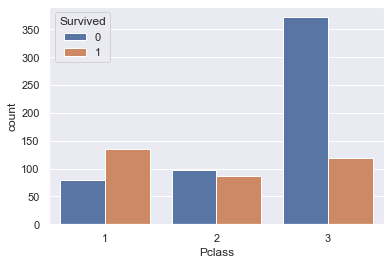

In [62]:
sns.countplot(x='Pclass', hue='Survived', data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

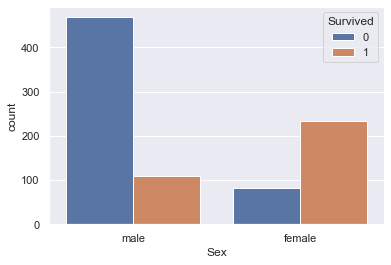

In [63]:
sns.countplot(x='Sex', hue='Survived', data=df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

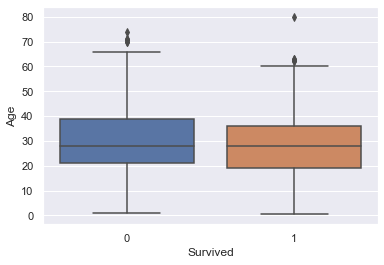

In [64]:
sns.boxplot(x= 'Survived', y='Age', data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

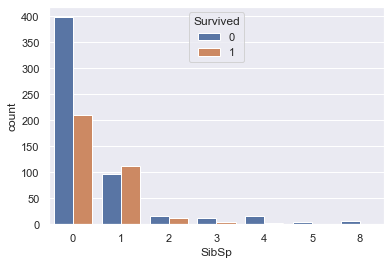

In [65]:
sns.countplot(x='SibSp', hue='Survived', data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

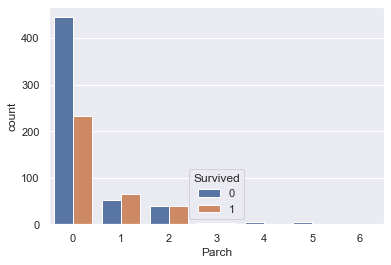

In [66]:
sns.countplot(x='Parch', hue='Survived', data=df)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

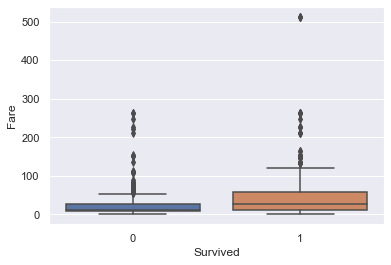

In [67]:
sns.boxplot(x= 'Survived', y='Fare', data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

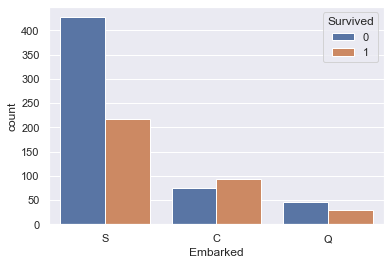

In [68]:
sns.countplot(x='Embarked', hue='Survived', data=df)

## Data Cleaning
We start by cleaning data. Two simple strategies that we look at: 
1. Remove features that do not have informational content or high correlation
2. Fix features with missing values (a little later to demonstrate `pipeline`


In [69]:
df.isnull().sum() #Find the missing feature count
# Dropping columns that should not affect survival or several missing values
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

<AxesSubplot:>

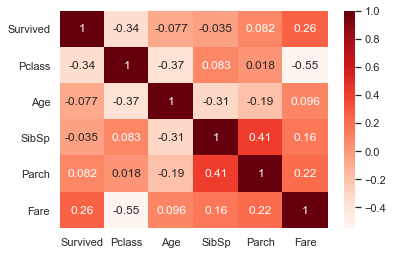

In [70]:
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds) # plot feature correlation

## Separate training data from test data (create train-validate-test sets)
Before feature engineering or outlier removal, separate training and test data (We never see test data in advance)
Use stratified sampling to ensure that classes are fairly represented in both train and test data.

In [71]:
class_labels = df['Survived'].values #save class labels separately
df['Survived'].value_counts() #check class imbalance and then adjust the split
df.drop(['Survived'], axis=1, inplace=True) # drop from df so it is not used in training

In [72]:
train_data, test_data, y_train, y_test = train_test_split(
    df, class_labels, test_size=0.2, random_state=42, stratify=class_labels) #Titanic was traveling at 42 km/h when it collided with the iceberg

In [73]:
print(test_data)

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked
565       3    male  24.0      2      0  24.1500        S
160       3    male  44.0      0      1  16.1000        S
553       3    male  22.0      0      0   7.2250        C
860       3    male  41.0      2      0  14.1083        S
241       3  female   NaN      1      0  15.5000        Q
..      ...     ...   ...    ...    ...      ...      ...
880       2  female  25.0      0      1  26.0000        S
91        3    male  20.0      0      0   7.8542        S
883       2    male  28.0      0      0  10.5000        S
473       2  female  23.0      0      0  13.7917        C
637       2    male  31.0      1      1  26.2500        S

[179 rows x 7 columns]


## Feature Engineering
*"Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling."*
*We will only perform basic transformations and not do feature engineering*

In [74]:
transformer_pipeline = sklearn.compose.make_column_transformer(
    (make_pipeline(sklearn.impute.SimpleImputer(), sklearn.preprocessing.StandardScaler()), ['Age']),
    (make_pipeline(sklearn.impute.SimpleImputer(strategy='constant', fill_value='UNKNOWN'), sklearn.preprocessing.OneHotEncoder()), ['Embarked']),
    (sklearn.preprocessing.StandardScaler(), ['Fare']),
    (sklearn.preprocessing.OneHotEncoder(), ['Pclass', 'Sex']))

transformer_pipeline.fit(train_data) #Fit on training data only

X_train = transformer_pipeline.transform(train_data)
X_test = transformer_pipeline.transform(test_data)

## Building a Model

We will learn hyperparameters, validate those on a validation set (through cross-validation), and then get final statistics through on the test set. For classifiers, we will try Random Forests and Support Vector Machines (why?).

### Random Forest

In [75]:
#define a grid of hyperparameter values
rf_grid = {
    'n_estimators': [200, 400],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,6],
    'criterion' :['gini', 'entropy']


}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), 
                     param_grid=rf_grid, 
                     refit='auc',
                     cv = StratifiedKFold(n_splits=5))
rf_cv.fit(X_train, y_train)
rf_cv.cv_results_
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [20]:
#Initialize the classifier with the best parameters
rf = RandomForestClassifier(n_estimators = 400, 
                            max_depth = 6, 
                            max_features = 'sqrt', 
                            random_state = 42, 
                            criterion = 'entropy').fit(X_train, y_train)

#predict and print confusion matrix
rf_pred = rf.predict(X_test)
sklearn.metrics.confusion_matrix(y_test, rf_pred)
print(sklearn.metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       110
           1       0.87      0.59      0.71        69

    accuracy                           0.81       179
   macro avg       0.83      0.77      0.78       179
weighted avg       0.82      0.81      0.80       179



In [21]:
rf.feature_importances_

array([0.17517619, 0.01466439, 0.00895912, 0.02128203, 0.00026455,
       0.20046716, 0.05479668, 0.02450397, 0.0833512 , 0.20638592,
       0.2101488 ])

### SVM

In [22]:
#define a grid of hyperparameter values
svm_grid = {'C': [0.1, 10, ],
              'gamma': [1, 0.1],
              'kernel': ['rbf']}
svm_cv = GridSearchCV(estimator=SVC(), 
                     param_grid=svm_grid, 
                     refit='auc',
                     cv = StratifiedKFold(n_splits=5, random_state=42,shuffle=True))
svm_cv.fit(X_train, y_train)
svm_cv.cv_results_
svm_cv.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [24]:
#Initialize the classifier with the best parameters
svm = SVC(C = 10,gamma = 0.1, kernel = 'rbf').fit(X_train, y_train)

#predict and print confusion matrix
svm_pred = svm.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, svm_pred))
print(sklearn.metrics.classification_report(y_test, svm_pred))

[[104   6]
 [ 30  39]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.85       110
           1       0.87      0.57      0.68        69

    accuracy                           0.80       179
   macro avg       0.82      0.76      0.77       179
weighted avg       0.81      0.80      0.79       179



## Summary

We built a fairly simple ML classifier using well accepted techniques (nothing special so far). This notebook provides the required background that you would need to understand what we will be covering in this course. Please enssure that you understand all the concepts covered in this notebook.

# Assignmnet 2 

In [23]:
import mlflow.sklearn

In [25]:
df = pd.read_csv('dataset/titanic.csv') #read the csv as a dataframe
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.isnull().sum() #Find the missing feature count
# Dropping columns that should not affect survival or several missing values
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [27]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [116]:
y = df.iloc[:,0]
X = df.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [119]:
rf_grid = {
    'n_estimators': [200, 400],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,6],
    'criterion' :['gini', 'entropy']


}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), 
                     param_grid=rf_grid, 
                     refit='auc',
                     cv = StratifiedKFold(n_splits=5))


In [130]:
transformer_pipeline = sklearn.compose.make_column_transformer(
    (make_pipeline(sklearn.impute.SimpleImputer(), sklearn.preprocessing.StandardScaler()), ['Age']),
    (make_pipeline(sklearn.impute.SimpleImputer(strategy='constant', fill_value='UNKNOWN'), sklearn.preprocessing.OneHotEncoder()), ['Embarked']),
    (sklearn.preprocessing.StandardScaler(), ['Fare']),
    (sklearn.preprocessing.OneHotEncoder(), ['Sex']))
transformer_pipeline.fit(X_train) 


model = Pipeline(steps=[
                       ("transformed_data",transformer_pipeline),
                        ("gridcvsearch", rf_cv)])

model.fit(X_train, y_train)

Pipeline(steps=[('transformed_data',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='UNKNOWN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                          

In [133]:
#rf_cv.cv_results_
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [141]:
rf_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred, pos_label='positive',average='micro'))
print("Recall:", recall_score(y_test, rf_pred,pos_label='positive',average='micro'))
print("f1:", f1_score(y_test, rf_pred,pos_label='positive',average='micro'))

Accuracy: 0.8324022346368715
Precision: 0.8324022346368715
Recall: 0.8324022346368715
f1: 0.8324022346368715


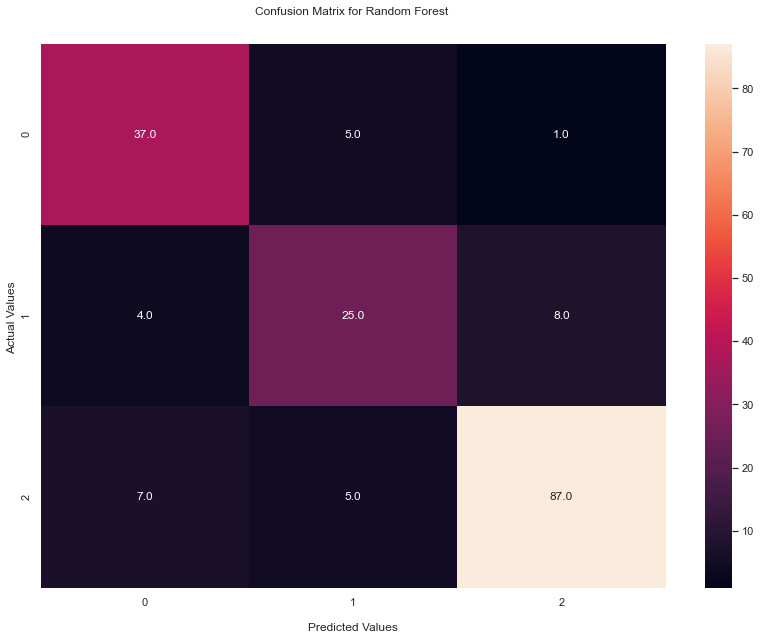

In [142]:
sklearn.metrics.confusion_matrix(y_test, rf_pred)
cf_matrix = confusion_matrix(y_test, rf_pred)
sns.set(rc={'figure.figsize':(14 ,10)})
ax = sns.heatmap(cf_matrix, annot=True, fmt=".1f")

ax.set_title('Confusion Matrix for Random Forest \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [143]:
import dvc.api

In [35]:
mlflow.sklearn.log_model(rf, "Model_for_A1")

NameError: name 'ml_course' is not defined

In [37]:
mlflow.end_run()
mlflow.start_run()
mlflow.log_param("my", "param")
mlflow.log_metric("score", 100)
mlflow.end_run()

In [38]:
from mlflow.tracking import MlflowClient

def print_registered_model_info(rm):
    print("name: {}".format(rm.name))
    print("tags: {}".format(rm.tags))
    print("description: {}".format(rm.description))

name = "SocialMediaTextAnalyzer"
tags = {"nlp.framework": "Spark NLP"}
desc = "This sentiment analysis model classifies the tone-happy, sad, angry."

mlflow.set_tracking_uri("sqlite:///mlruns.db")
client = MlflowClient()
client.create_registered_model(name, tags, desc)
print_registered_model_info(client.get_registered_model(name))

2022/06/08 22:05:13 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2022/06/08 22:05:13 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

name: SocialMediaTextAnalyzer
tags: {'nlp.framework': 'Spark NLP'}
description: This sentiment analysis model classifies the tone-happy, sad, angry.
